## 데이터 탐색

### 데이터의 요약이나 통계 정보를 출력

In [14]:
# 기본 작업
import numpy as np
import pandas as pd

# matplotlib 에서 한글 사용하기 위한 설정
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc("font", family = "AppleGothic")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)

### 탐색적 시각화

히스토그램

변수가 하나인 단변수 데이터의 빈도수를 표현

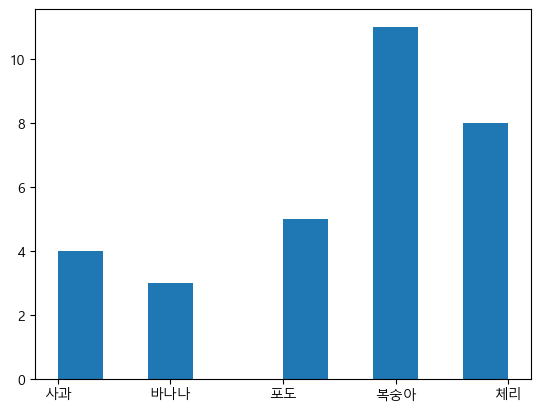

In [15]:
# lovefruits.csv 파일 읽기
# 첫행이 컬럼 이름
# 구분자는 ,
# 한글이 있음

df = pd.read_csv('./data2/lovefruits.csv', encoding = 'cp949')
# print(df)

# 정보 확인
# print(df.info())

# 빈도수 확인 - 옵션을 설정하지 않으면 내림차순 정렬 수행
data = df['선호과일'].value_counts(sort = False)
# print(data)

plt.hist(df['선호과일'])
plt.show()

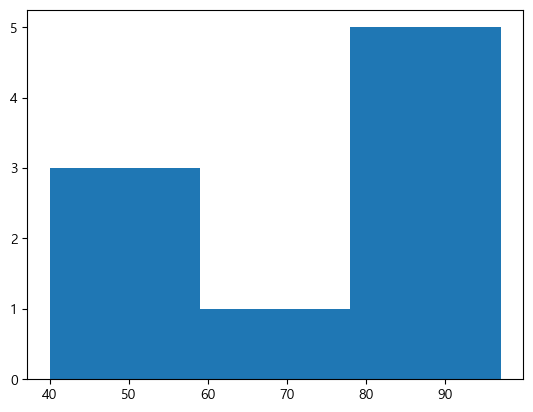

In [19]:
df = pd.read_csv('./data2/student.csv', encoding='ms949')
# print(df.info())
# 정수처럼 여러 값이 존재하는 경우는 되도록이면 구간 별로
# 히스토그램을 그리는 것이 좋음
plt.hist(df['수학'], bins = 3)
plt.show()

산포도

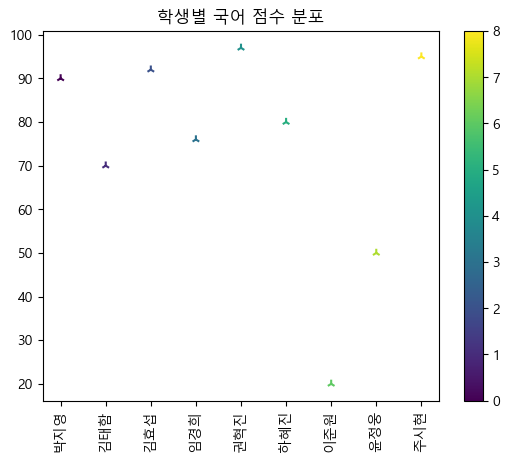

In [27]:
df = pd.read_csv('./data2/student.csv', encoding='ms949')

plt.figure()
colormap = df.index
plt.scatter(x = df.index, y = df['국어'], marker = '2', c = colormap)
plt.colorbar()
plt.xticks(range(0, len(df['국어']), 1), df['이름'], rotation = 'vertical')
plt.title('학생별 국어 점수 분포')

plt.show()

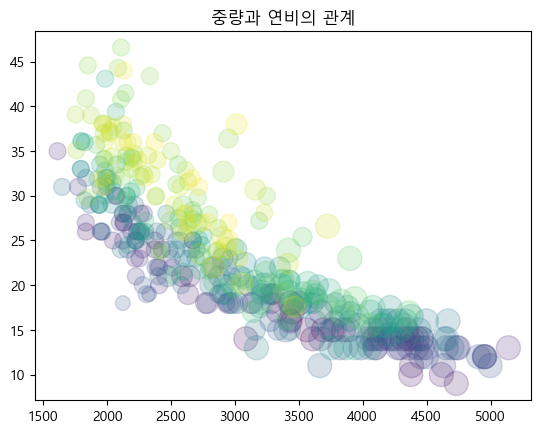

In [37]:
# 여러 개의 컬럼을 이용한 산포도
df = pd.read_csv('./data2/noheader_auto-mpg.csv', header= None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
# print(df.head())
df['cylinders_size']  = df.cylinders / df.cylinders.max() * 300
# print(df.head())

colormap = df.index
plt.scatter(x = df.weight, y = df.mpg, s = df.cylinders_size, c = colormap, alpha= 0.2)
plt.title('중량과 연비의 관계')
plt.show()

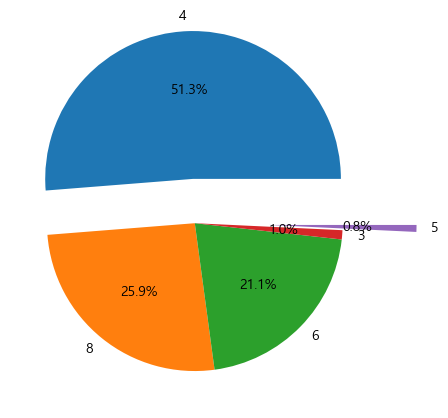

In [48]:
x = df.cylinders.value_counts()
# print(type(x))

# 중점으로부터 떨어뜨리는 비율
explode = (0.3,0,0,0,0.5)
plt.pie(x , labels = x.index, autopct= '%1.1f%%', explode=explode)
plt.show()

boxplot

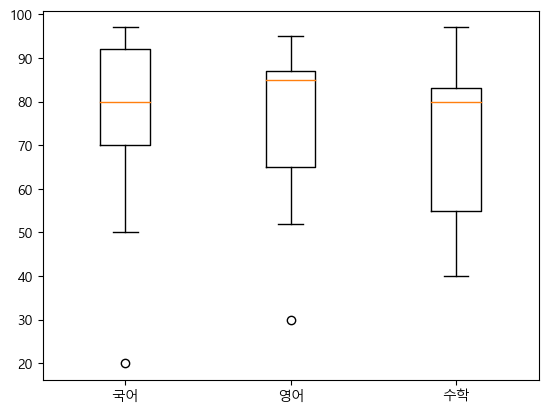

In [51]:
df = pd.read_csv('./data2/student.csv', encoding='ms949')
plt.boxplot([df.국어, df.영어, df.수학], labels = ['국어','영어','수학'])
plt.show()

## Seaborn

In [52]:
import seaborn as sns
tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


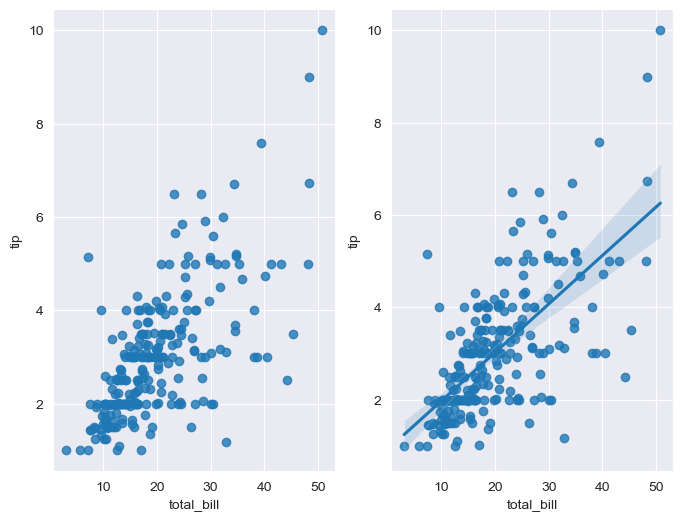

In [57]:
fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.set_style('darkgrid')
sns.regplot(x = 'total_bill', y = 'tip', data = tips, fit_reg=False, ax=ax1)
sns.regplot(x = 'total_bill', y = 'tip', data = tips, fit_reg=True, ax=ax2)
plt.show()

In [58]:
pip install folium

     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     -------------------------------------- 102.3/102.3 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [69]:
import folium

# 지도 생성 - location 중앙점 위치, zoom_start 확대 축소 배율
m = folium.Map(location = [37.572656, 126.973304],zoom_start = 15)
# 마커 출력
folium.Marker(location=[37.572656, 126.973304], popup='kb카드', icon=folium.Icon(icon = 'cloud')).add_to(m)
folium.Marker(location=[37.569072, 126.987279], popup='MegaIT', icon=folium.Icon(icon = 'cloud')).add_to(m)
folium.RegularPolygonMarker(location=[37.572656, 126.973304], popup='내 마음대로', number_of_sides=6, radius=30).add_to(m)

# html 파일로 저장
m.save('map.html')

m

In [75]:
df = pd.read_excel('./data2/서울지역_대학교_위치.xlsx')
# print(df.head())
# print(df.info())

m = folium.Map(location = [37.55, 126.98], zoom_start=12)
m

#DataFrame 데이터 순회
for name, lat, lng in zip(df['Unnamed: 0'], df['위도'], df['경도']):
    folium.CircleMarker([lat, lng],radius=10, color = 'blue', fill = True, fill_color = 'coral', fill_opactiy = 0.7, popup=name).add_to(m)

m

In [101]:
# 경기도 인구 단계 구분도
# json 파싱을 위한 패키지
import json

# 경기도 인구 데이터 가져오기
df = pd.read_excel("./data2/경기도인구데이터.xlsx")
# df.head()

# 컬럼 이름이 숫자 형태이므로 문자열로 변환
df.columns = df.columns.map(str)

# 행정 구역 경계와 관련된 json 파일을 열어서 파싱
# utf-8-sig 는 파일 형식에 상관없이 인코딩해서 디코딩을 편리하게 해주는 인코딩 형식
try:
    geo_data = json.load(open('./data2/경기도행정구역경계.json', encoding='utf-8'))
except:
    geo_data = json.load(open('./data2/경기도행정구역경계.json', encoding='utf-8-sig'))

# geo_data

df.index = df['구분']
# 지도 생성
g_map = folium.Map(location=[37.5502, 126.982], zoom_start=9, tiles = 'Stamen Terrain')

# 단계 구분도 만들기
folium.Choropleth(geo_data= geo_data, data = df['2007'], columns=[df.index, df['2007']],
                  fill_color='YlOrRd', fill_opacity= 0.7, line_opacity=0.3,
                  threshold_scale = [10000, 100000, 300000, 500000, 700000],
                  key_on = 'feature.properties.name').add_to(g_map)
g_map

<Axes: >

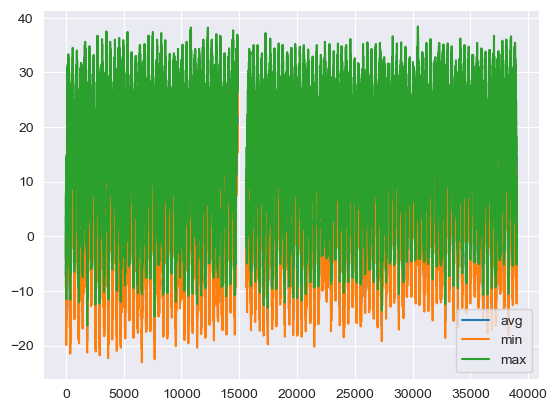

In [104]:
df = pd.read_csv('./data2/seoul.csv', encoding='ms949')
# print(df.info())
df.plot()

In [ ]:
# df['avg'].plot(kind = 'bar')

## Pandas 활용

### 중복 데이터 처리

In [3]:
df = pd.DataFrame([['안녕하세요', '니하오', '헬로우', '키아 오라', '안녕하세요'],
                ['한국', '중국', '미국', '뉴질랜드', '한국']])
df = df.T #열 과 행 전치
#print(df)

#print(df.duplicated()) #중복 확인

df.drop_duplicates(inplace=True)
print(df.duplicated()) #중복 확인

0    False
1    False
2    False
3    False
dtype: bool


### 함수 적용

In [ ]:
def f(data):
    return data + '...'

#Series 에 함수 적용
print(df[0].apply(lambda data : data + '...')) #Series는 셀 단위 적용
print(df.apply(f)) #DataFrame은 행 이나 열 단위 적용인데 기본은 열 단위 적용
print(df.applymap(f)) #applymap은 셀 단위 적용

import seaborn as sns
titanic = sns.load_dataset('titanic')
#print(titanic.head())

df = titanic[['age', 'fare']]
#print(df.head())

def min_max(data):
    return data.max() - data.min()
#열 단위로 함수 적용
result = df.apply(min_max, axis=0)
print(result)

In [ ]:
#print(titanic.head())
df = titanic[['age', 'fare']]
#print(type(df))

#하나의 데이터를 가지고 null 여부를 판단해주는 함수를 대입
#셀 단위로 적용해서 DataFrame을 리턴
#print(df.pipe(lambda x : x.isnull()))

def missing_value(x):
    return x.isnull()

#집계를 하는 함수를 대입하면 열 단위로 대입해서 집계를 수행한 후 Series를 리턴
print(df.pipe(lambda x : missing_value(x).sum()))

def missing_count(x):
    return missing_value(x).sum()

#Series를 리턴하는 함수를 대입하면 하나의 값을 리턴
print(df.pipe(lambda x : missing_count(x).sum()))

### 열 편집

In [ ]:
df = pd.read_excel('./data/주가데이터.xlsx')

#자료형이 datatime64 라서 split을 사용할 수 없음
#dates = df['연월일'].str.split('-')

#데이터 타입 변경 
#astype을 호출해서 변경
#map 함수에 형을 변경할 수 있는 함수를 대입
df['연월일'] = df['연월일'].astype('str')
dates = df['연월일'].str.split('-')
#print(dates.head())
df['연'] = dates.str.get(0)
df['월'] = dates.str.get(1)
df['일'] = dates.str.get(2)
print(df.head())

### 데이터 결합

In [6]:
df1 = pd.DataFrame({
    'a':['a0', 'a1', 'a2', 'a3'],
    'b':['b0', 'b1', 'b2', 'b3'],
    'c':['c0', 'c1', 'c2', 'c3'],   
}, index = [1, 2, 3, 4])


df2 = pd.DataFrame({
    'a':['a2', 'a3', 'a4', 'a5'],
    'b':['b2', 'b3', 'b4', 'b5'],
    'd':['c2', 'c3', 'c4', 'c5'],   
}, index = [2, 3, 4, 5])
#print(df1)
#print(df2)

#print(pd.concat([df1, df2])) #기본적으로 행 방향으로 결합
#동일한 컬럼은 값이 있지만 한쪽에만 존재하는 컬럼은 반대쪽에는 NaN

#print(pd.concat([df1, df2], axis=1)) #동일한 인덱스끼리 옆으로 결합
#한쪽에만 존재하는 데이터도 결합 - Outer Join

#print(pd.concat([df1, df2], axis=1, join='inner')) #동일한 인덱스끼리 옆으로 결합
#양쪽 모두에 존재하는 데이터만 결합 - Inner Join

In [7]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4,5, np.nan])
b = pd.Series(np.arange(len(a), dtype=np.float64))
#print(a)
#print(b)

#a 의 값이 NaN 인 경우는 b의 값으로 채우기
r = np.where(pd.isnull(a), b, a)
#numpy 의 1차원 배열은 출력할 때 행 방향으로 출력합니다.
#조건이 True 인 경우는 데이터1 False 인 경우는 데이터2
print(r)
print(pd.Series(r))
print(a.combine_first(b))

[0.  2.5 2.  3.5 4.  5.  6. ]
0    0.0
1    2.5
2    2.0
3    3.5
4    4.0
5    5.0
6    6.0
dtype: float64
0    0.0
1    2.5
2    2.0
3    3.5
4    4.0
5    5.0
6    6.0
dtype: float64


In [ ]:
price = pd.read_excel('./data/stock price.xlsx')
valuation= pd.read_excel('./data/stock valuation.xlsx')
#print(price)
#print(valuation)
inner_join = pd.merge(price, valuation)
print(inner_join)

In [ ]:
outer_join = pd.merge(price, valuation, how='outer')
print(outer_join)

In [ ]:
price = pd.read_excel('./data/stock price.xlsx', index_col = "id")
valuation= pd.read_excel('./data/stock valuation.xlsx', index_col="id")
print(price.join(valuation)) #인스턴스로 메서드 호출: bound 호출
print(pd.DataFrame.join(price, valuation)) #클래스로 인스턴스 메서드 호출: unbound 호출